In [ ]:
import numpy as np
import sympy
from sympy import I, latex
from IPython.display import display, Latex
import matplotlib.pyplot as plt

# Практическое занятие 10
# Компьютерный практикум по алгебре на Python
## Комплексные числа в sympy
### Задание 1.
Даны комплексные числа
$$
z_1 = 5\sqrt{3} + 5i,\quad z_2 = -3 + 3i,\quad z_3 = - 1 + i,\quad z_4 = i,\quad z_5 = \frac{12}{13} + \frac{5}{13}i,
$$
вычислить (представить в алгебраической форме) с помощью sympy
$$
z_1 \cdot z_2,\quad (z_2 - 5z_3)^6,\quad \sqrt{\frac{z_4}{z_3}},\quad \frac{z_1^2 + z_3}{13z_5 - 2z_2}.
$$

In [ ]:
def main() -> None:
    z1 = 5*3**sympy.S.Half + 5 * I
    z2 = -3 + 3*I
    z3 = -1 + I
    z4 = I
    z5 = sympy.S(12)/13 + sympy.S(5)/13*I

    display(Latex(f"z_1 \cdot z_2 = {latex(1*z2)}"))
    display(sympy.expand_complex((z2 - 5*z3)**6))
    display(sympy.expand_complex((z4/z3)**sympy.S.Half))
    display(sympy.expand_complex((z1*z1 + z3)/(13*z5 - 2*z2)))

if __name__ == "__main__":
    main()

<IPython.core.display.Latex object>

512*I

2**(3/4)*sqrt(sqrt(2)/4 + 1/2)/2 - 2**(3/4)*I*sqrt(1/2 - sqrt(2)/4)/2

-2*sqrt(3)/13 + 881/325 + I*(67/325 + 36*sqrt(3)/13)

### Задание  2.
Вычисления Задания 1 проделать для мнимой единицы из Python (использовать встроенную функцию complex).

In [ ]:
def main():
  z1 = complex(5*3**0.5, 5)
  z2 = complex(-3, 3)
  z3 = complex(-1, 1)
  z4 = complex(0, 1)
  z5 = complex(12/13, 5/13)
  print(f"z1 * z2 = {z1*z2}")
  print((z2 - 5*z3)**6)
  print((z4/z3)**0.5)
  print((z1*z1 + z3)/(13*z5 - 2*z2))
  
if __name__ == "__main__":
  main()

z1 * z2 = (-40.98076211353316+10.980762113533157j)
(-0+512j)
(0.7768869870150187-0.32179712645279135j)
(2.4442998757586336+5.002602236344583j)



### Задание  3.
Изобразить на координатной плоскости точки, соответствующие корням  $7$-й степени комплексного числа $z = \frac{3}{5} + i\frac{3}{5}$. Подписать точки $A_k$, где $k$  - номер корня.

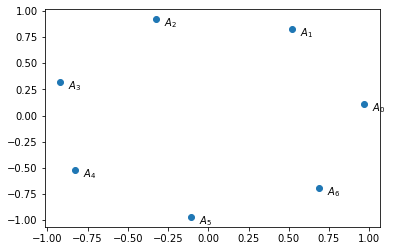

In [ ]:
def main():
  z = sympy.S(3)/5 + I*sympy.S(3)/5
  N: int = 7

  roots_list = [sympy.root(z, N, k) for k in range(N)]
  roots_x = [sympy.re(z_num) for z_num in roots_list]
  roots_y = [sympy.im(z_num) for z_num in roots_list]

  plt.scatter(roots_x, roots_y)
  for i, (root, root_x, root_y) in enumerate(zip(roots_list, roots_x, roots_y)):
    plt.annotate(
      f"$A_{i}$",
      xy=(root_x, root_y),
      xytext=(root_x + 0.05, root_y - 0.07)
    )

if __name__ == "__main__":
  main()


### Задание  4.
Изобразить на координатной плоскости точки, соответствующие $z_4 = - \sqrt{3} + 3i$ и $\bar{z_4}$, подписать $z_4$ тригонометрической формой, $\bar{z_4}$ - экспоненциальной ($z = r e^{i\varphi}$, $r$ и $\varphi$ такие же, как в тригонометрической форме).

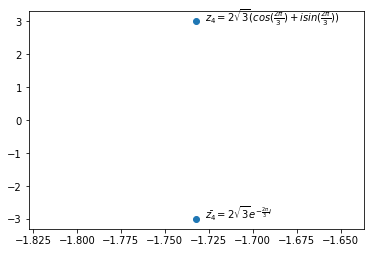

In [ ]:
def main():
  z4 = -(3**sympy.S.Half) + 3*I
  z4_conj = sympy.conjugate(z4)

  r = sympy.functions.Abs(z4)
  mod_tuple = (r, r)
  args_tuple = (sympy.functions.arg(z4), sympy.functions.arg(z4_conj))
  names: tuple[str] = (
    fr"$z_4 = {latex(r)} (cos({latex(args_tuple[0])}) + i sin({latex(args_tuple[0])}))$",
    fr"$ \bar{{z_4}} = {latex(r)} e^{{{latex(args_tuple[1])} i}}$"
  )
  x_coords = [-3**0.5, -3**0.5]
  y_coords = [3, -3]
  
  plt.scatter(x_coords, y_coords)
  for i, (name, root_x, root_y) in enumerate(zip(names, x_coords, y_coords)):
    plt.annotate(
        name,
        xy=(root_x, root_y),
        xytext=(root_x + 0.005, root_y)
    )

if __name__ == "__main__":
  main()

#### Задание  5.
Изобразить корни 4 степени числа $5e^{\frac{i\pi}{8}}$, в полярной системе координат, подписи к точкам - аргументы (углы) сответствующих комплексных чисел. 

Число вводить в тригонометрической форме, для получения корней комплексного числа $z = r(\cos(\varphi) + \sin(\varphi))$ использовать формулу 
$\sqrt[n]{z} = \sqrt[n]{r}(\cos(\varphi_k) + i \sin(\varphi_k))$, 
$\varphi_k = \frac{\varphi + 2\pi k}{n}$, $k = 0, ..., n$. 

Вывести алгебраическую форму полученных корней на экран и сравнить с результатом, полученным с помощью sympy.root (с использованием sympy.expand_complex для упрощения выражения). Аналитическое представление оказывается разным.

Для каждого корня найти разность модуля разности корней, полученных двумя способами (т.е. нужно для каждой пары одинаковых корней, полученных двумя способами находить разность корней, вычислять модуль sympy.Abs этой разности и вычислить приближенное значение с помощью evalf()).

5**(1/4)*(cos(pi/32) + I*sin(pi/32))

5**(1/4)*(-cos(15*pi/32) + I*sin(15*pi/32))

5**(1/4)*(-cos(pi/32) - I*sin(pi/32))

5**(1/4)*(cos(15*pi/32) - I*sin(15*pi/32))

5**(1/4)*exp(I*pi/32)

5**(1/4)*I*exp(I*pi/32)

-5**(1/4)*exp(I*pi/32)

-5**(1/4)*I*exp(I*pi/32)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

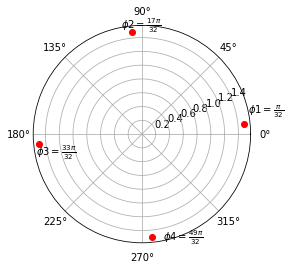

In [121]:
def main():
  N: int = 4

  # calculate roots manually
  r = sympy.S(5)
  phi = sympy.pi/8
  module_root = r**(sympy.S(1)/N)
  args_naive = [(phi + 2*sympy.pi*k)/N for k in range(N)]
  roots_naive = [module_root*(sympy.cos(phi_k) + I*sympy.sin(phi_k)) for phi_k in args_naive]
  display(*roots_naive)

  plt.polar(args_naive, [module_root for _ in range(N)], "ro")
  for i, phi_i in enumerate(args_naive):
    plt.annotate(
        fr"$\phi{i + 1} = {latex(phi_i)}$",
        xy=(phi_i, module_root),
        xytext=(phi_i + 0.1, module_root + 0.07)
    )

  # calculate roots using sympy.root
  z = 5*sympy.E**(I*sympy.pi/8)
  roots_list = [sympy.expand(sympy.root(z, N, k)) for k in range(N)]
  modules_list = [sympy.arg(root) for root in roots_list]
  args_list = [sympy.arg(root) for root in roots_list]
  display(*roots_list)

  for i, (root_naive, root_sympy) in enumerate(zip(roots_naive, roots_list)):
    delta = sympy.Abs(root_naive - root_sympy).evalf()
    display(Latex(f"\\text{{Модуль разности корней в {i+1} паре: }}{latex(delta)}"))
  

if __name__ == "__main__":
  main()


### Индивидуальное задание.
Решить уравнение.
Для получения корней использовать sympy.roots.
Корни уравнения вывести на экран в алгебраической, тригонометрической и экспоненциальной форме.

Вариант N 50

$(4 + 4i)x2+ (−16 −40i)x −16 + 80i = 0$

In [132]:
from typing import Any

def main():
  x = sympy.symbols('x')
  expr = (4 + 4*I)*x*x + (-16 - 40*I)*x - 16 + 80*I
  roots_dict: dict[Any, int] = sympy.roots(expr, x)

  display(Latex(fr"\text{{Всего корней: }}{sum(roots_dict.values())}"))
  print()
  roots = roots_dict.keys()
  for i, root in enumerate(roots):
    display(Latex(fr"\text{{Корень {i + 1}:}}"))
    display(Latex(fr"\text{{Алгебраическая форма: }}{latex(root)}"))
    
    r, phi = sympy.Abs(root), sympy.arg(root)
    with sympy.evaluate(False):
      trig_root = r*(sympy.cos(phi) + I*sympy.sin(phi))
    display(Latex(fr"\text{{Тригонометрическая форма: }}{latex(trig_root)}"))
    
    exp_root = r*sympy.E**(I*phi)
    display(Latex(fr"\text{{Экспоненциальная форма: }}{latex(exp_root)}"))
    print()

if __name__ == "__main__":
  main()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>